In [1]:
import sys
import pandas as pd



train = pd.read_csv("train.csv", na_values=['NA','?'])
train.head()



,id,name,manufacturer,pack,weight,height,width,length,cost
0,1,Large Red Generic Paperclips by WizBang,WizBang,390,2496.0,2.0,1.2,1.6,51.47
1,2,High Quality Pink Small Pencils,6% Solution,590,3776.0,2.0,1.2,1.6,213.76
2,3,Medium High Quality Ink Pens,Offices-R-Us,210,2016.0,3.0,1.8,2.4,131.52
3,4,Generic Medium Tablets by WizBang,WizBang,100,1120.0,3.5,2.1,2.8,117.83
4,5,High Quality Small Black Thumbtacks,6% Solution,670,3216.0,1.5,0.9,1.2,157.70


In [2]:


test = pd.read_csv("test.csv", na_values=['NA','?'])
test.head()



,id,name,manufacturer,pack,weight,height,width,length
0,10001,Tiny High Quality White Paperclips,6% Solution,320,512.0,0.5,0.3,0.4
1,10002,Tiny White High Quality Stapler by WizBang,WizBang,1,11.2,3.5,2.1,2.8
2,10003,Red High Quality Stapler,Offices-R-Us,2,32.0,5.0,3.0,4.0
3,10004,Generic Black Tiny Paperweights,6% Solution,5,48.0,3.0,1.8,2.4
4,10005,Tiny High Quality Green Post It Notes,6% Solution,44,70.4,0.5,0.3,0.4


In [3]:
train.shape

(10000, 9)

In [4]:
test.shape

(5000, 8)

In [5]:
# In[5]:

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))



The train data size before dropping Id feature is : (10000, 9) 
The test data size before dropping Id feature is : (5000, 8) 

The train data size after dropping Id feature is : (10000, 8) 
The test data size after dropping Id feature is : (5000, 7) 


In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



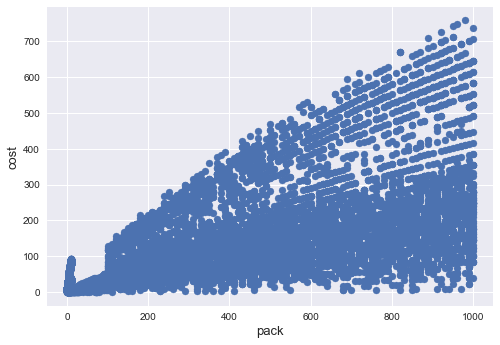

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['pack'], y = train['cost'])
plt.ylabel('cost', fontsize=13)
plt.xlabel('pack', fontsize=13)
plt.show()



 mu = 130.42 and sigma = 138.87



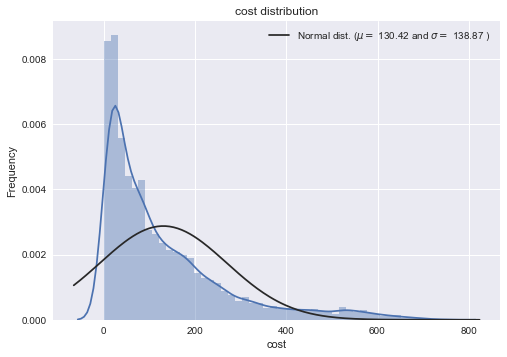

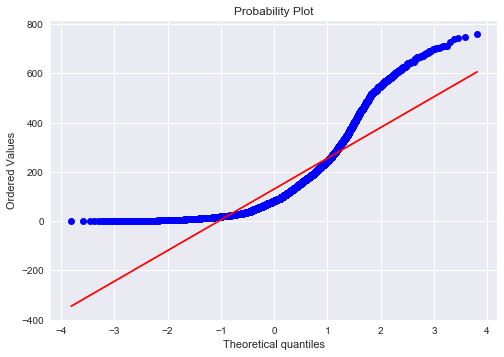

0       51.470
1      213.760
2      131.520
3      117.830
4      157.700
5      151.640
6      417.510
7       63.370
8      521.650
9       89.030
10      86.240
11     116.460
12      25.560
13      19.020
14      13.500
15     158.150
16     622.400
17      49.780
18      30.090
19      90.520
20     581.410
21     105.210
22     179.050
23      21.010
24      19.860
25     251.490
26      15.350
27     139.950
28      56.470
29      17.000
         ...  
9970   103.860
9971    21.340
9972    39.850
9973     8.070
9974     9.690
9975     9.520
9976    26.690
9977    84.690
9978    11.310
9979    33.160
9980   595.190
9981   281.380
9982    21.340
9983    25.000
9984   282.500
9985    27.840
9986   538.180
9987   153.830
9988    79.820
9989   221.010
9990   252.090
9991    11.570
9992   388.700
9993     1.320
9994    15.130
9995   199.760
9996   197.090
9997   143.900
9998   127.270
9999    55.250
Name: cost, Length: 10000, dtype: float64


In [8]:
sns.distplot(train['cost'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['cost'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('cost distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['cost'], plot=plt)
plt.show()
print(train['cost'])



 mu = 4.26 and sigma = 1.24



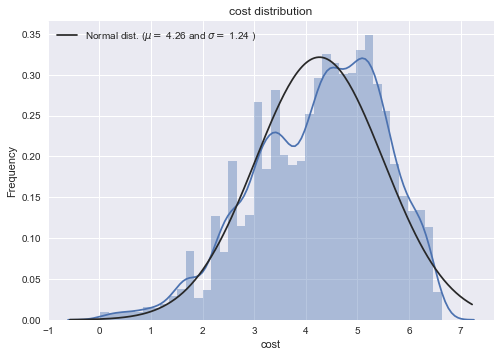

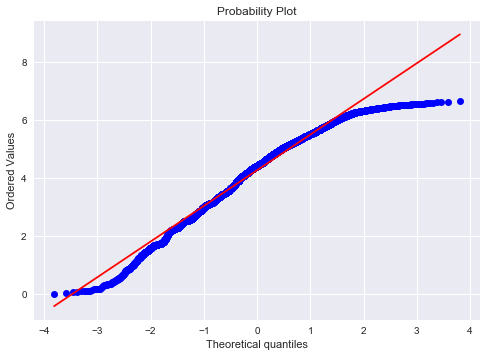

0      3.960
1      5.370
2      4.887
3      4.778
4      5.067
5      5.028
6      6.037
7      4.165
8      6.259
9      4.500
10     4.469
11     4.766
12     3.279
13     2.997
14     2.674
15     5.070
16     6.435
17     3.928
18     3.437
19     4.517
20     6.367
21     4.665
22     5.193
23     3.091
24     3.038
25     5.531
26     2.794
27     4.948
28     4.051
29     2.890
        ... 
9970   4.653
9971   3.106
9972   3.710
9973   2.205
9974   2.369
9975   2.353
9976   3.321
9977   4.451
9978   2.510
9979   3.531
9980   6.391
9981   5.643
9982   3.106
9983   3.258
9984   5.647
9985   3.362
9986   6.290
9987   5.042
9988   4.392
9989   5.403
9990   5.534
9991   2.531
9992   5.965
9993   0.842
9994   2.781
9995   5.302
9996   5.289
9997   4.976
9998   4.854
9999   4.030
Name: cost, Length: 10000, dtype: float64


In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["cost"] = np.log1p(train["cost"])

#Check the new distribution 
sns.distplot(train['cost'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['cost'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('cost distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['cost'], plot=plt)
plt.show()

print(train['cost'])

In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.cost.values
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))
print(y_train)

print(train['cost'])

all_data size is : (15000, 8)
[ 3.96024158  5.36952113  4.88673358 ...,  4.97604385  4.85413742
  4.02980604]
0      3.960
1      5.370
2      4.887
3      4.778
4      5.067
5      5.028
6      6.037
7      4.165
8      6.259
9      4.500
10     4.469
11     4.766
12     3.279
13     2.997
14     2.674
15     5.070
16     6.435
17     3.928
18     3.437
19     4.517
20     6.367
21     4.665
22     5.193
23     3.091
24     3.038
25     5.531
26     2.794
27     4.948
28     4.051
29     2.890
        ... 
9970   4.653
9971   3.106
9972   3.710
9973   2.205
9974   2.369
9975   2.353
9976   3.321
9977   4.451
9978   2.510
9979   3.531
9980   6.391
9981   5.643
9982   3.106
9983   3.258
9984   5.647
9985   3.362
9986   6.290
9987   5.042
9988   4.392
9989   5.403
9990   5.534
9991   2.531
9992   5.965
9993   0.842
9994   2.781
9995   5.302
9996   5.289
9997   4.976
9998   4.854
9999   4.030
Name: cost, Length: 10000, dtype: float64


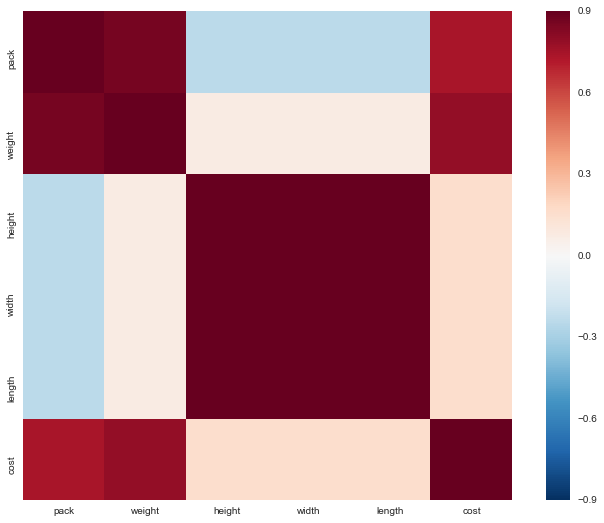

In [11]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
all_data['manufacturer'] = all_data['manufacturer'].astype(str)


In [13]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [14]:
def label_high_quality (row):
   if 'High Quality' in row['name']:
      return 1
   return 0

def label_small (row):
   if 'Small' in row['name']:
      return 1
   return 0

def label_lake (row):
   if 'Lake' in row['name']:
      return 1
   return 0

def label_duck (row):
   if 'Duck' in row['name']:
      return 1
   return 0

def label_black (row):
   if 'Black' in row['name']:
      return 1
   return 0

def label_large (row):
   if 'Large' in row['name']:
      return 1
   return 0

def label_generic (row):
   if 'Generic' in row['name']:
      return 1
   return 0

def label_WizBang (row):
   if 'WizBang' in row['name']:
      return 1
   return 0

def label_tiny (row):
   if 'Tiny' in row['name']:
      return 1
   return 0

def label_Medium (row):
   if 'Medium' in row['name']:
      return 1
   return 0

def label_Office (row):
   if 'Office' in row['name']:
      return 1
   return 0


def label_White (row):
   if 'White' in row['name']:
      return 1
   return 0


def label_Deep (row):
   if 'Deep' in row['name']:
      return 1
   return 0


def label_Supplies (row):
   if 'Supplies' in row['name']:
      return 1
   return 0

def label_Pens (row):
   if 'Pens' in row['name']:
      return 1
   return 0

def label_Red (row):
   if 'Red' in row['name']:
      return 1
   return 0

def label_Green (row):
   if 'Green' in row['name']:
      return 1
   return 0

def label_Ink (row):
   if 'Ink' in row['name']:
      return 1
   return 0

def label_Blue (row):
   if 'Blue' in row['name']:
      return 1
   return 0

def label_Brown (row):
   if 'Brown' in row['name']:
      return 1
   return 0


def label_Notes (row):
   if 'Notes' in row['name']:
      return 1
   return 0

def label_Paperclips (row):
   if 'Paperclips' in row['name']:
      return 1
   return 0

def label_Paperweights (row):
   if 'Paperweights' in row['name']:
      return 1
   return 0

def label_Pencils (row):
   if 'Pencils' in row['name']:
      return 1
   return 0

def label_Pink (row):
   if 'Pink' in row['name']:
      return 1
   return 0

def label_Post (row):
   if 'Post' in row['name']:
      return 1
   return 0

def label_Stapler (row):
   if 'Stapler' in row['name']:
      return 1
   return 0

def label_Tablets (row):
   if 'Tablets' in row['name']:
      return 1
   return 0

def label_Thumbtacks (row):
   if 'Thumbtacks' in row['name']:
      return 1
   return 0




all_data['label_high_quality'] = all_data.apply (lambda row: label_high_quality (row),axis=1)
all_data['label_small'] = all_data.apply (lambda row: label_small (row),axis=1)
all_data['label_lake'] = all_data.apply (lambda row: label_lake (row),axis=1)
all_data['label_duck'] = all_data.apply (lambda row: label_duck (row),axis=1)
all_data['label_black'] = all_data.apply (lambda row: label_black (row),axis=1)
all_data['label_generic'] = all_data.apply (lambda row: label_generic (row),axis=1)
all_data['label_WizBang'] = all_data.apply (lambda row: label_WizBang (row),axis=1)
all_data['label_tiny'] = all_data.apply (lambda row: label_tiny (row),axis=1)
all_data['label_Medium'] = all_data.apply (lambda row: label_Medium (row),axis=1)
all_data['label_Office'] = all_data.apply (lambda row: label_Office (row),axis=1)
all_data['label_White'] = all_data.apply (lambda row: label_White (row),axis=1)
all_data['label_Deep'] = all_data.apply (lambda row: label_Deep (row),axis=1)
all_data['label_Supplies'] = all_data.apply (lambda row: label_Supplies (row),axis=1)
all_data['label_Pens'] = all_data.apply (lambda row: label_Pens (row),axis=1)
all_data['label_Red'] = all_data.apply (lambda row: label_Red (row),axis=1)
all_data['label_Green'] = all_data.apply (lambda row: label_Green (row),axis=1)
all_data['label_Ink'] = all_data.apply (lambda row: label_Ink (row),axis=1)

all_data['label_Blue'] = all_data.apply (lambda row: label_Blue (row),axis=1)
all_data['label_Brown'] = all_data.apply (lambda row: label_Brown (row),axis=1)
all_data['label_Notes'] = all_data.apply (lambda row: label_Notes (row),axis=1)
all_data['label_Paperclips'] = all_data.apply (lambda row: label_Paperclips (row),axis=1)
all_data['label_Paperweights'] = all_data.apply (lambda row: label_Paperweights (row),axis=1)
all_data['label_Pencils'] = all_data.apply (lambda row: label_Pencils (row),axis=1)
all_data['label_Pink'] = all_data.apply (lambda row: label_Pink (row),axis=1)
all_data['label_Post'] = all_data.apply (lambda row: label_Post (row),axis=1)
all_data['label_Stapler'] = all_data.apply (lambda row: label_Stapler (row),axis=1)
all_data['label_Tablets'] = all_data.apply (lambda row: label_Tablets (row),axis=1)
all_data['label_Thumbtacks'] = all_data.apply (lambda row: label_Thumbtacks (row),axis=1)



all_data.head()

,cost,height,length,manufacturer,name,pack,weight,width,label_high_quality,label_small,...,label_Brown,label_Notes,label_Paperclips,label_Paperweights,label_Pencils,label_Pink,label_Post,label_Stapler,label_Tablets,label_Thumbtacks
0,3.960,2.000,1.600,WizBang,Large Red Generic Paperclips by WizBang,390,2496.000,1.200,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.370,2.000,1.600,6% Solution,High Quality Pink Small Pencils,590,3776.000,1.200,1,1,...,0,0,0,0,1,1,0,0,0,0
2,4.887,3.000,2.400,Offices-R-Us,Medium High Quality Ink Pens,210,2016.000,1.800,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.778,3.500,2.800,WizBang,Generic Medium Tablets by WizBang,100,1120.000,2.100,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.067,1.500,1.200,6% Solution,High Quality Small Black Thumbtacks,670,3216.000,0.900,1,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
encode_text_dummy(all_data, 'manufacturer')

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (15000, 40)


In [16]:
all_data.head()

,cost,height,length,name,pack,weight,width,label_high_quality,label_small,label_lake,...,label_Pink,label_Post,label_Stapler,label_Tablets,label_Thumbtacks,manufacturer-6% Solution,manufacturer-Deep Office Supplies,manufacturer-Duck Lake,manufacturer-Offices-R-Us,manufacturer-WizBang
0,3.960,2.000,1.600,Large Red Generic Paperclips by WizBang,390,2496.000,1.200,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.370,2.000,1.600,High Quality Pink Small Pencils,590,3776.000,1.200,1,1,0,...,1,0,0,0,0,1,0,0,0,0
2,4.887,3.000,2.400,Medium High Quality Ink Pens,210,2016.000,1.800,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.778,3.500,2.800,Generic Medium Tablets by WizBang,100,1120.000,2.100,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,5.067,1.500,1.200,High Quality Small Black Thumbtacks,670,3216.000,0.900,1,1,0,...,0,0,0,0,1,1,0,0,0,0


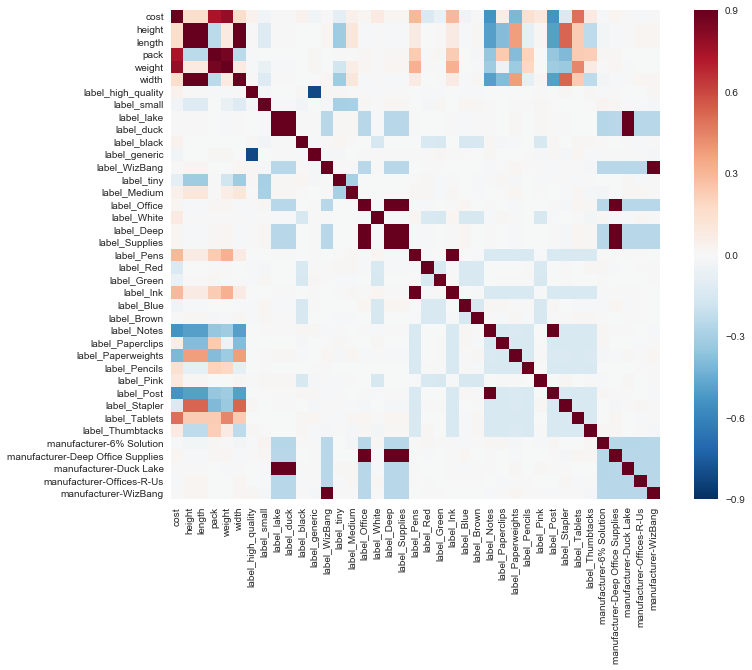

In [17]:
corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [18]:
all_data['weight/pack'] = all_data['weight']/all_data['pack']
all_data['volume'] = all_data['height']*all_data['length']*all_data['width']
all_data['density'] = all_data['weight']/all_data['volume']





In [19]:
all_data.head()

,cost,height,length,name,pack,weight,width,label_high_quality,label_small,label_lake,...,label_Tablets,label_Thumbtacks,manufacturer-6% Solution,manufacturer-Deep Office Supplies,manufacturer-Duck Lake,manufacturer-Offices-R-Us,manufacturer-WizBang,weight/pack,volume,density
0,3.960,2.000,1.600,Large Red Generic Paperclips by WizBang,390,2496.000,1.200,0,0,0,...,0,0,0,0,0,0,1,6.400,3.840,650.000
1,5.370,2.000,1.600,High Quality Pink Small Pencils,590,3776.000,1.200,1,1,0,...,0,0,1,0,0,0,0,6.400,3.840,983.333
2,4.887,3.000,2.400,Medium High Quality Ink Pens,210,2016.000,1.800,1,0,0,...,0,0,0,0,0,1,0,9.600,12.960,155.556
3,4.778,3.500,2.800,Generic Medium Tablets by WizBang,100,1120.000,2.100,0,0,0,...,1,0,0,0,0,0,1,11.200,20.580,54.422
4,5.067,1.500,1.200,High Quality Small Black Thumbtacks,670,3216.000,0.900,1,1,0,...,0,1,1,0,0,0,0,4.800,1.620,1985.185


In [20]:

import itertools as it
all_columns = [i for i in ['height','length','pack','weight','width']]
#print(all_columns)

combine_list = list(it.combinations(all_columns, 2))

#print(combine_list)

for i in range(len(combine_list)):
    
    a = combine_list[i]
    
    b = all_data[a[0]]
    c = all_data[a[1]]
    
    if c.any()== 0 or b.isnull().any():
        continue
    all_data[str(i)+'0'] = b/c
    all_data[str(i)+'1'] = c/b
    all_data[str(i)+'2'] = b*c
    

    
all_data.replace([np.inf, -np.inf], np.nan)
all_data.fillna(all_data.mean())

all_data.head()




,cost,height,length,name,pack,weight,width,label_high_quality,label_small,label_lake,...,62,70,71,72,80,81,82,90,91,92
0,3.960,2.000,1.600,Large Red Generic Paperclips by WizBang,390,2496.000,1.200,0,0,0,...,1.920,0.156,6.400,973440.000,325.000,0.003,468.000,2080.000,0.000,2995.200
1,5.370,2.000,1.600,High Quality Pink Small Pencils,590,3776.000,1.200,1,1,0,...,1.920,0.156,6.400,2227840.000,491.667,0.002,708.000,3146.667,0.000,4531.200
2,4.887,3.000,2.400,Medium High Quality Ink Pens,210,2016.000,1.800,1,0,0,...,4.320,0.104,9.600,423360.000,116.667,0.009,378.000,1120.000,0.001,3628.800
3,4.778,3.500,2.800,Generic Medium Tablets by WizBang,100,1120.000,2.100,0,0,0,...,5.880,0.089,11.200,112000.000,47.619,0.021,210.000,533.333,0.002,2352.000
4,5.067,1.500,1.200,High Quality Small Black Thumbtacks,670,3216.000,0.900,1,1,0,...,1.080,0.208,4.800,2154720.000,744.444,0.001,603.000,3573.333,0.000,2894.400


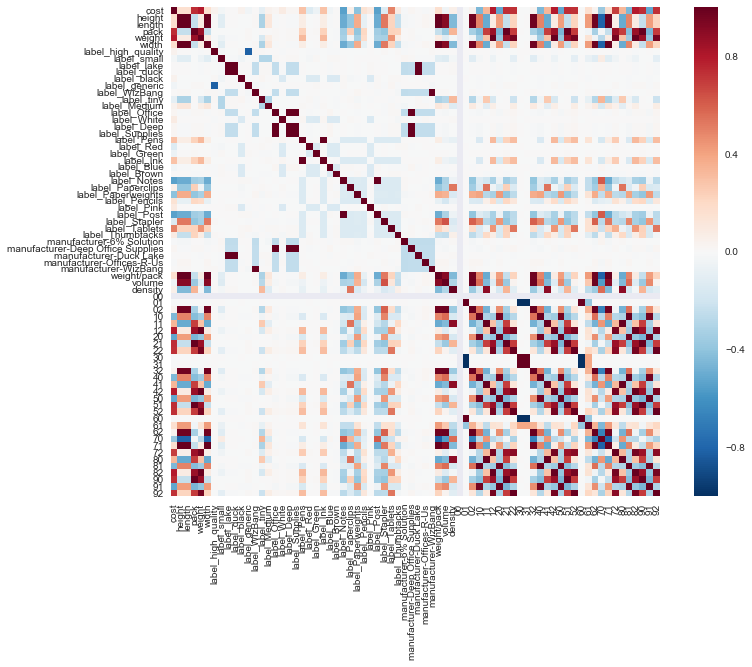

In [21]:
corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [23]:
#all_data.head()

all_data

,height,length,pack,weight,width,label_high_quality,label_small,label_lake,label_duck,label_black,...,61,70,71,72,80,81,82,90,91,92
0,2.000,1.600,390,2496.000,1.200,0,0,0,0,0,...,0.750,0.156,6.400,973440.000,325.000,0.003,468.000,2080.000,0.000,2995.200
1,2.000,1.600,590,3776.000,1.200,1,1,0,0,0,...,0.750,0.156,6.400,2227840.000,491.667,0.002,708.000,3146.667,0.000,4531.200
2,3.000,2.400,210,2016.000,1.800,1,0,0,0,0,...,0.750,0.104,9.600,423360.000,116.667,0.009,378.000,1120.000,0.001,3628.800
3,3.500,2.800,100,1120.000,2.100,0,0,0,0,0,...,0.750,0.089,11.200,112000.000,47.619,0.021,210.000,533.333,0.002,2352.000
4,1.500,1.200,670,3216.000,0.900,1,1,0,0,1,...,0.750,0.208,4.800,2154720.000,744.444,0.001,603.000,3573.333,0.000,2894.400
5,3.500,2.800,350,3920.000,2.100,1,0,1,1,0,...,0.750,0.089,11.200,1372000.000,166.667,0.006,735.000,1866.667,0.001,8232.000
6,3.500,2.800,670,7504.000,2.100,1,0,0,0,0,...,0.750,0.089,11.200,5027680.000,319.048,0.003,1407.000,3573.333,0.000,15758.400
7,1.500,1.200,200,960.000,0.900,0,1,1,1,0,...,0.750,0.208,4.800,192000.000,222.222,0.005,180.000,1066.667,0.001,864.000
8,4.000,3.200,790,10112.000,2.400,1,0,0,0,0,...,0.750,0.078,12.800,7988480.000,329.167,0.003,1896.000,4213.333,0.000,24268.800
9,0.500,0.400,830,1328.000,0.300,1,0,0,0,0,...,0.750,0.625,1.600,1102240.000,2766.667,0.000,249.000,4426.667,0.000,398.400


In [24]:

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

numeric_feats =numeric_feats.drop('manufacturer-6% Solution')
numeric_feats =numeric_feats.drop('manufacturer-Deep Office Supplies')
numeric_feats =numeric_feats.drop('manufacturer-Duck Lake')
numeric_feats =numeric_feats.drop('manufacturer-Offices-R-Us')
numeric_feats =numeric_feats.drop('manufacturer-WizBang')

numeric_feats =numeric_feats.drop('label_high_quality')
numeric_feats =numeric_feats.drop('label_small')
numeric_feats =numeric_feats.drop('label_lake')
numeric_feats =numeric_feats.drop('label_duck')
numeric_feats =numeric_feats.drop('label_black')
numeric_feats =numeric_feats.drop('label_generic')
numeric_feats =numeric_feats.drop('label_WizBang')
numeric_feats =numeric_feats.drop('label_tiny')
numeric_feats =numeric_feats.drop('label_Medium')
numeric_feats =numeric_feats.drop('label_Office')
numeric_feats =numeric_feats.drop('label_White')
numeric_feats =numeric_feats.drop('label_Deep')
numeric_feats =numeric_feats.drop('label_Supplies')
numeric_feats =numeric_feats.drop('label_Pens')
numeric_feats =numeric_feats.drop('label_Red')
numeric_feats =numeric_feats.drop('label_Green')
numeric_feats =numeric_feats.drop('label_Ink')

numeric_feats =numeric_feats.drop('label_Blue')
numeric_feats =numeric_feats.drop('label_Brown')
numeric_feats =numeric_feats.drop('label_Notes')
numeric_feats =numeric_feats.drop('label_Paperclips')
numeric_feats =numeric_feats.drop('label_Paperweights')
numeric_feats =numeric_feats.drop('label_Pencils')
numeric_feats =numeric_feats.drop('label_Pink')
numeric_feats =numeric_feats.drop('label_Post')
numeric_feats =numeric_feats.drop('label_Stapler')
numeric_feats =numeric_feats.drop('label_Tablets')
numeric_feats =numeric_feats.drop('label_Thumbtacks')





In [25]:
numeric_feats

Index(['height', 'length', 'pack', 'weight', 'width', 'weight/pack', 'volume',
       'density', '00', '10', '11', '12', '20', '21', '22', '40', '41', '42',
       '50', '51', '52', '61', '70', '71', '72', '80', '81', '82', '90', '91',
       '92'],
      dtype='object')

In [26]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
density,5.447
10,3.825
81,3.825
40,3.825
91,3.552
50,3.552
20,3.552
80,2.957
11,2.957
41,2.957


In [27]:
skewness = skewness[abs(skewness.Skew)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 20 skewed numerical features to Box Cox transform


In [28]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [29]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [30]:
numStages = 3
ypred = np.zeros((train.shape[0], numStages))

In [31]:
ypred.shape


(10000, 3)

In [32]:
train.shape


(10000, 64)

In [33]:
test.shape


(5000, 64)

In [34]:
y_train.shape


(10000,)

In [35]:
y_train

array([ 3.96024158,  5.36952113,  4.88673358, ...,  4.97604385,
        4.85413742,  4.02980604])

In [36]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [37]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [38]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [39]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [40]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [41]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                              nthread = -1)

In [42]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,

                              learning_rate=0.05, n_estimators=720,

                              max_bin = 55, bagging_fraction = 0.8,

                              bagging_freq = 5, feature_fraction = 0.2319,

                              feature_fraction_seed=9, bagging_seed=9,

                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [43]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [44]:
import pickle
import math        
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

def mm_model_fit():
    T = 2
    for t in range(T):
        print("Start: Iteration %d \n" % (t))
        
        for stage in range(numStages):
            print("Stage %d \n" % (stage))
            target_stage = y_train - ypred[:, np.arange(numStages)!=stage].sum(axis=1)
            print('target_stage')
            print(target_stage)
            
            
            if stage == 0:
                """
                param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3,0.2,0.4,0.6,0.8],
                              "kernel": ['polynomial'],
                              "degree": [1,2,3,4,5],
                              "coef0": [1,1.5,2,2.5,3,3.5,4,4.5,5]
                             }
                reg = GridSearchCV(KernelRidge(), cv=3, param_grid=param_grid)
                """
                reg = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
                
                #KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
                
                
                reg.fit(train.values,target_stage)
                #print(lasso.coef_)
                ypred[:,stage] = reg.predict(train.values)
                print(ypred)
                
                pickle.dump(reg, open("stage_"+str(stage), 'wb'))
    
                
                
                print("first step score (RMSE): {}".format(rmsle(y_train,ypred[:,stage])))
                
            elif stage == 0:
                """
                param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3,0.2,0.4,0.6,0.8],
                              "kernel": ['polynomial'],
                              "degree": [1,2,3,4,5],
                              "coef0": [1,1.5,2,2.5,3,3.5,4,4.5,5]
                             }
                reg = GridSearchCV(KernelRidge(), cv=3, param_grid=param_grid)
                """
                reg = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
                
                #KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
                
                
                reg.fit(train.values,target_stage)
                #print(lasso.coef_)
                ypred[:,stage] = reg.predict(train.values)
                print(ypred)
                
                pickle.dump(reg, open("stage_"+str(stage), 'wb'))
    
                
                
                print("first step score (RMSE): {}".format(rmsle(y_train,ypred[:,stage])))
                    
                    
                
            
            else:
                if t == T-1:
                    break
                
                
                reg = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
                
                reg.fit(train.values,target_stage)
                ypred[:,stage] = reg.predict(train.values)
                print(ypred)
                print("first step score (RMSE): {}".format(rmsle(y_train,ypred[:,stage])))
                
               
                
                pickle.dump(reg, open("stage_"+str(stage), 'wb'))
                
    print("final score (RMSE): {}".format(rmsle(y_train,ypred.sum(axis=1))))

In [45]:

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


'\nscore = rmsle_cv(lasso)\nprint("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\nscore = rmsle_cv(ENet)\nprint("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\nscore = rmsle_cv(KRR)\nprint("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\nscore = rmsle_cv(GBoost)\nprint("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\nscore = rmsle_cv(model_xgb)\nprint("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\nscore = rmsle_cv(model_lgb)\nprint("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))\n'

In [46]:
#mm_model_fit()     

In [47]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [48]:
#averaged_models = AveragingModels(models = (GBoost, model_xgb, model_lgb,KRR))

#score = rmsle_cv(averaged_models)
#print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [49]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [50]:
#stacked_averaged_models = StackingAveragedModels(base_models = (model_xgb,GBoost, KRR),
#                                                 meta_model = model_lgb)

#score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [51]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [52]:
#stacked_averaged_models.fit(train.values, y_train)
#stacked_train_pred = stacked_averaged_models.predict(train.values)
#stacked_pred = stacked_averaged_models.predict(test.values)
#print(rmsle(y_train, stacked_train_pred))

In [53]:
KRR.fit(train.values, y_train)
KRR_train_pred = KRR.predict(train.values)
KRR_pred = KRR.predict(test.values)
print(rmsle(y_train, KRR_train_pred))

0.128036496313


In [54]:
GBoost.fit(train, y_train)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = GBoost.predict(test)
print(rmsle(y_train, GBoost_train_pred))

0.106687976549


In [55]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

0.106492612416


In [56]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = model_lgb.predict(test.values)
print(rmsle(y_train, lgb_train_pred))

0.125370852006


In [57]:
rg = np.arange(0.0, 1.0, 0.005).tolist()
for i in rg:
    print('RMSLE score on train data:'+str(i))
    print(rmsle(y_train,
                   xgb_train_pred*i + (1-i)*GBoost_train_pred ))

RMSLE score on train data:0.0
0.106687976549
RMSLE score on train data:0.005
0.106633039437
RMSLE score on train data:0.01
0.106578616746
RMSLE score on train data:0.015
0.106524709256
RMSLE score on train data:0.02
0.106471317776
RMSLE score on train data:0.025
0.10641844317
RMSLE score on train data:0.03
0.106366085857
RMSLE score on train data:0.035
0.106314247106
RMSLE score on train data:0.04
0.106262927181
RMSLE score on train data:0.045
0.106212127556
RMSLE score on train data:0.05
0.106161847966
RMSLE score on train data:0.055
0.106112089718
RMSLE score on train data:0.06
0.106062853469
RMSLE score on train data:0.065
0.106014139958
RMSLE score on train data:0.07
0.105965950515
RMSLE score on train data:0.075
0.105918285157
RMSLE score on train data:0.08
0.105871143888
RMSLE score on train data:0.085
0.105824528962
RMSLE score on train data:0.09
0.105778440608
RMSLE score on train data:0.095
0.105732878155
RMSLE score on train data:0.1
0.105687844272
RMSLE score on train data:0

In [58]:
ensemble = xgb_pred*0.55 + (1-0.55)*GBoost_pred 


In [59]:
sub = pd.DataFrame()
sub['id'] = test_ID
sub['cost'] = np.expm1(ensemble)

#negative handling
sub.cost[sub.cost <0]=0.05
sub.to_csv('submission.csv',index=False)

In [60]:
"""
ypred = np.zeros((test.shape[0], numStages))
for stage in range(numStages):
    
    if stage == 0:
        loaded_model = pickle.load(open("stage_"+str(stage), 'rb'))
        ypred[:,stage] = loaded_model.predict(test.values)
    elif stage == 1:
        loaded_model = pickle.load(open("stage_"+str(stage), 'rb'))
        ypred[:,stage] = loaded_model.predict(test.values)
    else:
        loaded_model = pickle.load(open("stage_"+str(stage), 'rb'))
        ypred[:,stage] = loaded_model.predict(test.values)
    
    
final_ypred = ypred.sum(axis=1)
"""

'\nypred = np.zeros((test.shape[0], numStages))\nfor stage in range(numStages):\n    \n    if stage == 0:\n        loaded_model = pickle.load(open("stage_"+str(stage), \'rb\'))\n        ypred[:,stage] = loaded_model.predict(test.values)\n    elif stage == 1:\n        loaded_model = pickle.load(open("stage_"+str(stage), \'rb\'))\n        ypred[:,stage] = loaded_model.predict(test.values)\n    else:\n        loaded_model = pickle.load(open("stage_"+str(stage), \'rb\'))\n        ypred[:,stage] = loaded_model.predict(test.values)\n    \n    \nfinal_ypred = ypred.sum(axis=1)\n'

In [61]:
"""
sub = pd.DataFrame()
sub['id'] = test_ID
sub['cost'] = np.expm1(final_ypred)

#negative handling
sub.cost[sub.cost <0]=0.05
sub.to_csv('submission.csv',index=False)
"""

"\nsub = pd.DataFrame()\nsub['id'] = test_ID\nsub['cost'] = np.expm1(final_ypred)\n\n#negative handling\nsub.cost[sub.cost <0]=0.05\nsub.to_csv('submission.csv',index=False)\n"